# Final

author: Luis Perez

email: luis0@stanford.edu

In [375]:
import numpy as np
from scipy import linalg
import seaborn as sns
import math
from matplotlib import pyplot as plt

In [20]:
np.set_printoptions(suppress=True, precision=3)

## Problem 1


In [437]:
def getProblem1Inputs():
    p = np.array([
        [2,2,0,-2,-2,0,0,0,0,0,0],
        [0.5, -2, 0, 0.5, -2, 0,0,0,0,0,0]
    ])
    T = np.array([10, 20, 30, 40, 50, 60, 61, 62, 63, 64, 65])
    A = np.array([
        [1, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 1],
        [0, 0, 0, 1]
    ])
    B = np.array([
        [0.5, 0],
        [1, 0],
        [0, 0.5],
        [0, 1]
    ])
    Bg = np.array([
        [0],
        [0],
        [-0.5],
        [-1]
    ])
    return A, B, Bg, T, p

In [472]:
def createMatrixA(A, B, T):
    allAts = []
    for t in T:
        matrices = []
        currPow = np.eye(A.shape[0])
        for _ in range(t):
            matrices.append(np.dot(currPow, B))
            currPow = np.dot(currPow, A)
        matrices.reverse()
        zeros = np.zeros((A.shape[0], 2*np.max(T) - 2*t))
        At = np.concatenate(matrices + [zeros], axis=1)
        At = np.dot(np.array([
            [1, 0, 0, 0],
            [0, 0, 1, 0]
        ]), At)
        assert At.shape == (2, 130)
        allAts.append(At)
    Ahat = np.vstack(allAts)
    assert Ahat.shape == (22, 130)
    return Ahat

def createYHat(A, Bg, T, p):
    yts = []
    for i, t in enumerate(T):
        Asum = np.zeros(A.shape)
        At = np.eye(A.shape[0])
        for _ in range(t):
            Asum += At
            At = np.dot(At, A)
        pt = p[:, i]
        pt.shape = (2,1)
        yt = pt - np.dot(np.array([
            [1, 0, 0, 0],
            [0, 0, 1, 0]
        ]), np.dot(Asum, Bg))
        assert yt.shape == (2,1)
        yts.append(yt)
    yhat = np.vstack(yts)
    assert yhat.shape == (22, 1)
    return yhat

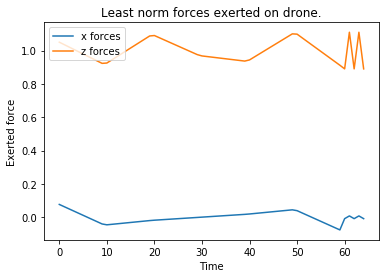

In [591]:
A, B, Bg, T, p = getProblem1Inputs()
Ahat = createMatrixA(A, B, T)
yhat = createYHat(A, Bg, T, p)
uln = np.dot(np.dot(Ahat.T, np.linalg.inv(np.dot(Ahat, Ahat.T))), yhat)

# plot optimal u against time
plt.plot(range(65), uln[:len(uln):2], label="x forces")
plt.plot(range(65), uln[1:len(uln):2], label="z forces")
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Exerted force')
plt.title('Least norm forces exerted on drone.')
plt.savefig('../final/least_norm_forces.png')

In [592]:
def plotTrajectory(A, B, Bg, u):
    state = np.zeros((4,1))
    xs = [0]
    zs = [0]
    for t in range(0,130,2):
        ut = np.array([u[t],u[t+1]])
        state = np.dot(A, state) + np.dot(B, ut) + Bg
        xs.append(state[0])
        zs.append(state[2])
    plt.plot(xs, zs)

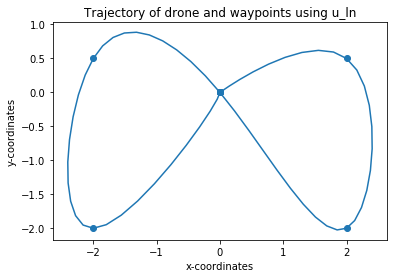

In [593]:
plt.scatter(p[0,:], p[1,:])
plotTrajectory(A, B, Bg, uln)
plt.title('Trajectory of drone and waypoints using u_ln')
plt.xlabel("x-coordinates")
plt.ylabel("y-coordinates")
plt.savefig('../final/drone_trajectory.png')

In [598]:
# Plot tradeoff curves.
def plotTradeoffCurves(A, y):
    J1s = []
    J2s = []
    for mu in np.logspace(0,7,50):
        Abig = np.vstack((A, mu * np.eye(65, M=A.shape[1])))
        ybig = np.vstack((y, np.zeros((65,1))))
        muStar = np.dot(np.dot(np.linalg.inv(np.dot(Abig.T, Abig)), Abig.T), ybig)
        
        optJ1 = np.linalg.norm(np.dot(A, muStar) - y)
        optJ2 = np.linalg.norm(muStar)
        J1s.append(optJ1)
        J2s.append(optJ2)
    plt.plot(J1s, J2s)
    return (J1s, J2s)
    

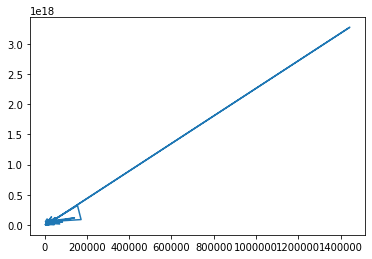

In [599]:
J1, J2 = plotTradeoffCurves(Ahat, yhat)

In [585]:
J1

[11770.778386332018]

In [586]:
J2

[3132869672841160.0]

## Problem 2

In [192]:
def getProblem2Inputs():
    A1 = np.array([
        [0] * 7 + [1] + [0] * 7,
        [0] * 7 + [1, -1] + [0] * 6,
        [0] * 8 + [1, -1] + [0] * 5,
        [0] * 9 + [1, -1] + [0] * 4,
        [0] * 10 + [1, -1] + [0] * 3,
        [0] * 11 + [1, -1] + [0] * 2,
        [0] * 12 + [1, -1] + [0] * 1,
        [-1] + [0] * 6 + [-1] + [0] * 6 + [7],
        [0] * 1 + [1] + [0] * 6 + [-1] + [0]*5 + [-1],
        [0] * 2 + [1] + [0] * 6 + [-1] + [0]*4 + [-1],
        [0] * 3 + [1] + [0] * 6 + [-1] + [0]*3 + [-1],
        [0] * 4 + [1] + [0] * 6 + [-1] + [0]*2 + [-1],
        [0] * 5 + [1] + [0] * 6 + [-1] + [0]*1 + [-1],
        [0] * 6 + [1] + [0] * 6 + [-1] + [-1],
        [0] * 15
    ])
    A2 = np.array([
        [0] * 7 + [1] + [0] * 7,
        [0] * 7 + [1, -1] + [0] * 6,
        [0] * 8 + [1, -1] + [0] * 5,
        [0] * 9 + [1, -1] + [0] * 4,
        [0] * 10 + [1, -1] + [0] * 3,
        [0] * 11 + [1, -1] + [0] * 2,
        [0] * 12 + [1, -1] + [0] * 1,
        [-1] + [0] * 6 + [-1] + [0] * 6 + [7],
        [0] * 1 + [0.5, -0.5] + [0] * 5 + [-1] + [0]*6,
        [0] * 2 + [0.5, -0.5] + [0] * 5 + [-1] + [0]*5,
        [0] * 3 + [0.5, -0.5] + [0] * 5 + [-1] + [0]*4,
        [0] * 4 + [0.5, -0.5] + [0] * 5 + [-1] + [0]*3,
        [0] * 5 + [0.5, -0.5] + [0] * 5 + [-1] + [0]*2,
        [0] * 6 + [1] + [0] * 6 + [-1] + [-1],
        [0] * 15
    ])
    A3 = np.array([
        [0] * 7 + [1] + [0] * 7, 
        [0] * 8 + [1] + [0] * 6, 
        [0] * 9 + [1] + [0] * 5, 
        [0] * 10 + [1] + [0] * 4, 
        [0] * 11 + [1] + [0] * 3, 
        [0] * 12 + [1] + [0] * 2, 
        [0] * 13 + [1] + [0] * 1,
        
        [-1] + [0]*6 + [-1] + [0]*6 + [7],
        [0]* 1 + [-1] + [0]*6 + [-1] + [0]*5 + [6], 
        [0]* 2 + [-1] + [0]*6 + [-1] + [0]*4 + [5],
        [0]* 3 + [-1] + [0]*6 + [-1] + [0]*3 + [4],
        [0]* 4 + [-1] + [0]*6 + [-1] + [0]*2 + [3],
        [0]* 5 + [-1] + [0]*6 + [-1] + [0]*1 + [2],
        [0]* 6 + [-1] + [0]*6 + [-1] + [1],
        [0] * 15
    ])
    return A1, A2, A3

In [193]:
A1, A2, A3 = getProblem2Inputs()

In [194]:
w1, v1 = np.linalg.eig(A1)
indexMin = np.argmin(np.abs(np.real(w1)))
eigenVector = v1[:, indexMin]
np.real(eigenVector)

array([ 0.935,  0.134,  0.134,  0.134,  0.134,  0.134,  0.134, -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.134])

In [195]:
w1

array([-0.5+0.866j, -0.5-0.866j, -0.5+0.866j, -0.5-0.866j, -0.5+0.866j,
       -0.5-0.866j, -0.5+0.866j, -0.5-0.866j, -0.5+0.866j, -0.5-0.866j,
       -0.5+0.866j, -0.5-0.866j, -0.5+0.866j, -0.5-0.866j,  0. +0.j   ])

In [196]:
w2, v2 = np.linalg.eig(A2)
indexMin2 = np.argmin(np.abs(np.real(w2)))
eigenVector2 = v2[:, indexMin2]
np.real(eigenVector2)

array([ 0.935,  0.134,  0.134,  0.134,  0.134,  0.134,  0.134, -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,  0.134])

In [197]:
w2

array([-0.5  +1.31j , -0.5  -1.31j , -0.5  +1.207j, -0.5  -1.207j,
       -0.035+0.j   , -0.965+0.j   , -0.5  +0.207j, -0.5  -0.207j,
       -0.5  +1.004j, -0.5  -1.004j, -0.5  +0.701j, -0.5  -0.701j,
       -0.5  +0.866j, -0.5  -0.866j,  0.   +0.j   ])

In [198]:
w3, v3 = np.linalg.eig(A3)
indexMin3 = np.argmin(np.abs(np.real(w3)))
eigenVector3 = v3[:, indexMin3]
np.real(eigenVector3)

array([ 0.59 ,  0.505,  0.421,  0.337,  0.253,  0.168,  0.084, -0.   ,
       -0.   ,  0.   , -0.   , -0.   , -0.   , -0.   ,  0.084])

In [260]:
w3

array([-0.5+0.866j, -0.5-0.866j, -0.5+0.866j, -0.5-0.866j, -0.5+0.866j,
       -0.5-0.866j, -0.5+0.866j, -0.5-0.866j, -0.5+0.866j, -0.5-0.866j,
       -0.5+0.866j, -0.5-0.866j, -0.5+0.866j, -0.5-0.866j,  0. +0.j   ])

In [270]:
# Verify some of this stuff works.
for i in range(100):
    x = np.dot(linalg.expm(100*A1), np.concatenate((np.random.rand(14), [1])))
    assert np.allclose(x, np.array([7,1,1,1,1,1,1,0,0,0,0,0,0,0,1]))

In [271]:
for i in range(100):
    x = np.dot(linalg.expm(1000*A2), np.concatenate((np.random.rand(14), [1])))
    assert np.allclose(x, np.array([7,1,1,1,1,1,1,0,0,0,0,0,0,0,1]))

In [272]:
for i in range(100):
    x = np.dot(linalg.expm(100*A3), np.concatenate((np.random.rand(14), [1])))
    assert np.allclose(x, np.array([7,6,5,4,3,2,1,0,0,0,0,0,0,0,1]))

In [322]:
def runSimulation(A, initialState, usesSpaces=True):
    if usesSpaces:
        xFinal = np.array([7,1,1,1,1,1,1,0,0,0,0,0,0,0,1])
    else:
        xFinal = np.array([7,6,5,4,3,2,1,0,0,0,0,0,0,0,1])
    t = 0.05
    state = initialState.flatten()
    closestCollision = None
    closestCollisionTime = None
    jetsInvolved = None
    while not np.allclose(state, xFinal):
        state = np.dot(linalg.expm(t * A), initialState).flatten()
        if usesSpaces:
            distances = state[1:7]
        else:
            distances = (state[:6] - state[1:7])
            
        # Find min space. If negative, a collision happend.
        minSpace = distances.min()
        if minSpace <= 0:
            for jet in np.array(range(7,1,-1))[distances < 0]:
                print('Collision occured at t = %s between jet %s and jet %s.' % (t, jet, jet-1))
            return
        elif not closestCollision or (closestCollision > minSpace):
            closestCollision = minSpace
            closestCollisionTime = t
            jetsInvolved = np.array(range(7,1,-1))[np.abs(distances - minSpace) < 1e-4]
        t += 0.05
        
    for jet in jetsInvolved:
        print('Closest collision occured at t = %s between jet %s and jet %s with spacing of %s.' % (
            closestCollisionTime, jet, jet-1, closestCollision))
                

In [323]:
initialConditionWithSpaces = np.array([
    [8],
    [1],
    [1],
    [2],
    [2],
    [1],
    [1],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [1]
])
runSimulation(A1, initialConditionWithSpaces)

Collision occured at t = 8.349999999999984 between jet 2 and jet 1.


In [324]:
# Verify results. We see that the s_1 = -0.001 (a collision).
np.dot(linalg.expm(8.35 * A1), initialConditionWithSpaces)

array([[ 7.016],
       [ 0.96 ],
       [ 1.188],
       [ 1.343],
       [ 0.977],
       [ 0.356],
       [-0.001],
       [-0.014],
       [ 0.04 ],
       [ 0.208],
       [ 0.089],
       [-0.341],
       [-0.714],
       [-0.607],
       [ 1.   ]])

In [325]:
runSimulation(A2,initialConditionWithSpaces)

Closest collision occured at t = 2.3499999999999996 between jet 7 and jet 6 with spacing of 0.31462333372486384.


In [326]:
np.dot(linalg.expm(2.35 * A2), initialConditionWithSpaces)

array([[ 7.021],
       [ 0.315],
       [ 1.222],
       [ 1.485],
       [ 1.501],
       [ 1.399],
       [ 1.081],
       [-0.319],
       [-0.326],
       [-0.211],
       [-0.002],
       [ 0.176],
       [ 0.111],
       [ 0.034],
       [ 1.   ]])

In [329]:
initialConditionWithoutSpaces = np.array([
    [8],
    [7],
    [6],
    [4],
    [2],
    [1],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [1]
])
runSimulation(A3,initialConditionWithoutSpaces, usesSpaces=False)

Closest collision occured at t = 3.649999999999995 between jet 5 and jet 4 with spacing of 0.8370070662304583.
Closest collision occured at t = 3.649999999999995 between jet 4 and jet 3 with spacing of 0.8370070662304583.


In [330]:
np.dot(linalg.expm(3.65 * A3), initialConditionWithoutSpaces)

array([[ 6.837],
       [ 5.837],
       [ 4.837],
       [ 4.   ],
       [ 3.163],
       [ 2.163],
       [ 1.163],
       [ 0.004],
       [ 0.004],
       [ 0.004],
       [-0.   ],
       [-0.004],
       [-0.004],
       [-0.004],
       [ 1.   ]])